# Open File titels

In [1]:
with open ('housing.csv') as fp:
    for line in fp:
        print(line)
        break

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity



# Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# (2) Data Preparation

In [3]:
#================================================================================
#=======================>> (2) Data Preparation <<===============================
#=========================>>  بدست آوردن داده ها <<================================
#================================================================================

In [4]:
#Importing housing Dataset

df_house = pd.read_csv('housing.csv')
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Checking which columns consists of null values
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#Checking data type across variables
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


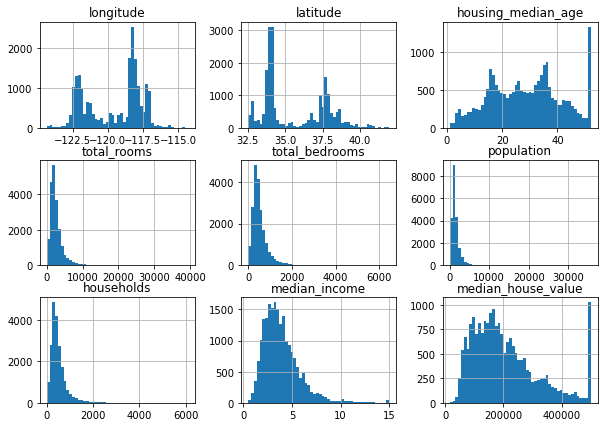

In [7]:
# Analysing data by using histogram plot

df_house.hist(bins = 50, figsize = (10,7))
plt.show()

In [8]:
# Description of dataset
df_house.describe(include = 'all').round(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-120.0,36.0,29.0,2636.0,538.0,1425.0,500.0,4.0,206856.0,NaN
std,2.0,2.0,13.0,2182.0,421.0,1132.0,382.0,2.0,115396.0,NaN
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0,NaN
25%,-122.0,34.0,18.0,1448.0,296.0,787.0,280.0,3.0,119600.0,NaN
50%,-118.0,34.0,29.0,2127.0,435.0,1166.0,409.0,4.0,179700.0,NaN
75%,-118.0,38.0,37.0,3148.0,647.0,1725.0,605.0,5.0,264725.0,NaN


<AxesSubplot:xlabel='total_rooms', ylabel='Density'>

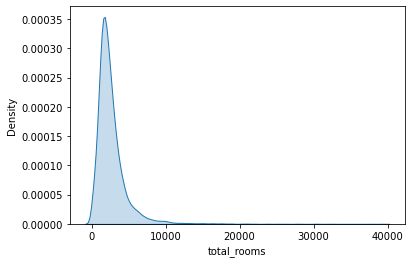

In [9]:
# the difference of mean, max of ['total_rooms'] feature is very high in the tabel of describe. the sns kdeplot shwos it clearly. 

sns.kdeplot(df_house['total_rooms'] , shade = True , legend = True)
# we have outliers between 10000 and 40000 

<AxesSubplot:xlabel='total_rooms', ylabel='Density'>

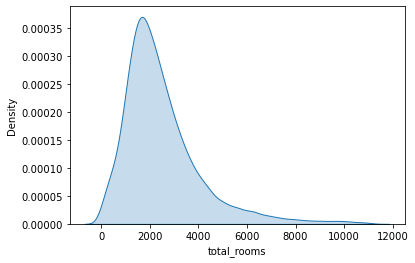

In [10]:
# we normalize the outliers in the above plot.

q = df_house['total_rooms'].quantile(0.99)
data_1 = df_house[df_house['total_rooms']<q]
sns.kdeplot(data_1['total_rooms'] , shade = True)


In [11]:
# Description of dataset after normalize.

data_1.describe(include = 'all').round(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.0,20433.0,20433.0,20433.0,20227.0,20433.0,20433.0,20433.0,20433.0,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9064
mean,-120.0,36.0,29.0,2500.0,514.0,1366.0,479.0,4.0,206548.0,NaN
std,2.0,2.0,12.0,1650.0,340.0,908.0,311.0,2.0,115463.0,NaN
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0,NaN
25%,-122.0,34.0,18.0,1442.0,295.0,783.0,278.0,3.0,119000.0,NaN
50%,-118.0,34.0,29.0,2111.0,431.0,1158.0,407.0,4.0,179300.0,NaN
75%,-118.0,38.0,37.0,3104.0,637.0,1700.0,595.0,5.0,264400.0,NaN


<AxesSubplot:xlabel='population', ylabel='Density'>

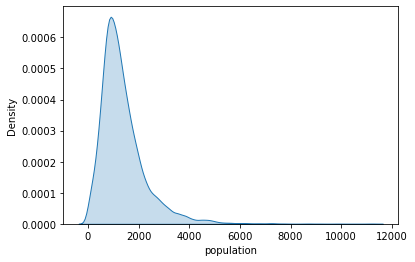

In [12]:
# the difference of mean, max of ['population'] feature is very high in the tabel of describe. the sns kdeplot shwos it clearly.

sns.kdeplot(data_1['population'] , shade = True , legend = True)
# we have outliers between 6000 and 12000 

<AxesSubplot:xlabel='population', ylabel='Density'>

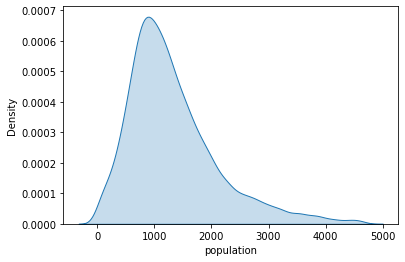

In [13]:
# we normalize the outliers in the above plot.
q = data_1['population'].quantile(0.99)
data_2 = data_1[data_1['population']<q]
sns.kdeplot(data_2['population'] , shade = True)

In [14]:
# Description of dataset after normalize.
data_2.describe(include = 'all').round(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20228.0,20228.0,20228.0,20228.0,20025.0,20228.0,20228.0,20228.0,20228.0,20228
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8973
mean,-120.0,36.0,29.0,2447.0,502.0,1323.0,467.0,4.0,206897.0,NaN
std,2.0,2.0,12.0,1553.0,315.0,796.0,287.0,2.0,115761.0,NaN
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0,NaN
25%,-122.0,34.0,19.0,1436.0,294.0,781.0,277.0,3.0,118875.0,NaN
50%,-119.0,34.0,29.0,2099.0,429.0,1152.0,404.0,4.0,179650.0,NaN
75%,-118.0,38.0,37.0,3065.0,630.0,1681.0,588.0,5.0,265100.0,NaN


<AxesSubplot:xlabel='households', ylabel='Density'>

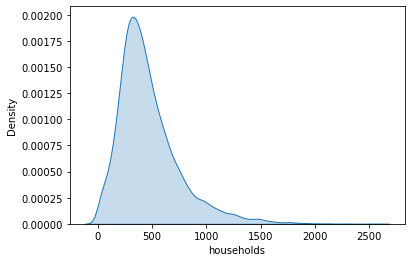

In [15]:
# the difference of mean, max of ['households'] feature is very high in the tabel of describe. the sns kdeplot shwos it clearly. 

sns.kdeplot(data_2['households'] , shade = True , legend = True)
# we have outliers between 1500 and 2500 

<AxesSubplot:xlabel='households', ylabel='Density'>

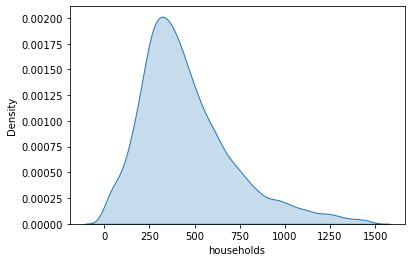

In [16]:
# we normalize the outliers in the above plot.
q = data_2['households'].quantile(0.99)
data_3 = data_2[data_2['households']<q]
sns.kdeplot(data_3['households'] , shade = True)

In [17]:
# Description of dataset after normalize.
data_3.describe(include = 'all').round(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20024.0,20024.0,20024.0,20024.0,19823.0,20024.0,20024.0,20024.0,20024.0,20024
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8859
mean,-120.0,36.0,29.0,2393.0,489.0,1299.0,455.0,4.0,206516.0,NaN
std,2.0,2.0,12.0,1452.0,286.0,759.0,260.0,2.0,115787.0,NaN
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0,NaN
25%,-122.0,34.0,19.0,1430.0,292.0,776.0,276.0,3.0,118800.0,NaN
50%,-119.0,34.0,29.0,2084.0,426.0,1145.0,401.0,4.0,179200.0,NaN
75%,-118.0,38.0,37.0,3023.0,622.0,1659.0,580.0,5.0,264500.0,NaN


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

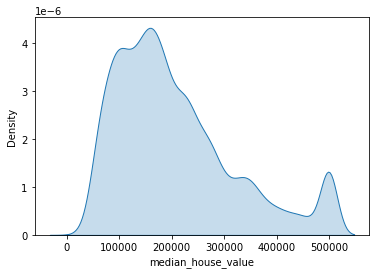

In [18]:
# ['median_house_value'] has some abnormality.
sns.kdeplot(data_3['median_house_value'] , shade = True , legend = True)

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

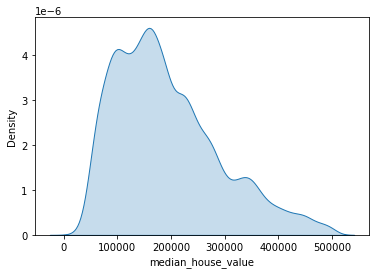

In [19]:
#we normalize abnormality of ['median_house_value']

q = data_3['median_house_value'].quantile(0.99)
data_4 = data_3[data_3['median_house_value']<q]
sns.kdeplot(data_4['median_house_value'] , shade = True)

In [20]:
# Description of dataset after normalize.
data_4.describe(include = 'all').round()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,19085.0,19085.0,19085.0,19085.0,18891.0,19085.0,19085.0,19085.0,19085.0,19085
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8343
mean,-120.0,36.0,29.0,2376.0,490.0,1312.0,456.0,4.0,192076.0,NaN
std,2.0,2.0,12.0,1441.0,286.0,763.0,260.0,2.0,98080.0,NaN
min,-124.0,33.0,1.0,2.0,2.0,3.0,2.0,0.0,14999.0,NaN
25%,-122.0,34.0,18.0,1420.0,294.0,785.0,278.0,3.0,115500.0,NaN
50%,-119.0,34.0,29.0,2070.0,427.0,1156.0,403.0,3.0,173200.0,NaN
75%,-118.0,38.0,37.0,2999.0,623.0,1678.0,581.0,5.0,247900.0,NaN


In [21]:
# missing_values of ['total_bedrooms']
data_4['total_bedrooms'].isnull().sum()

194

In [22]:
df_categorical = data_4.copy()
data_4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
df_num = data_4.drop('ocean_proximity' , axis = 1)
df_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [24]:
# simple imputer fill missing_values with median of each columns data.
imputer = SimpleImputer (missing_values = np.nan, strategy = 'median')

imputer.fit(df_num)              #==================> df_num  is a Frame
x = imputer.transform(df_num)    #==================> x is a array

df_num_impute = pd.DataFrame(x, columns = df_num.columns)

df_num_impute.info()
df_num_impute.describe(include = 'all').round()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19085 non-null  float64
 1   latitude            19085 non-null  float64
 2   housing_median_age  19085 non-null  float64
 3   total_rooms         19085 non-null  float64
 4   total_bedrooms      19085 non-null  float64
 5   population          19085 non-null  float64
 6   households          19085 non-null  float64
 7   median_income       19085 non-null  float64
 8   median_house_value  19085 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19085.0,19085.0,19085.0,19085.0,19085.0,19085.0,19085.0,19085.0,19085.0
mean,-120.0,36.0,29.0,2376.0,489.0,1312.0,456.0,4.0,192076.0
std,2.0,2.0,12.0,1441.0,284.0,763.0,260.0,2.0,98080.0
min,-124.0,33.0,1.0,2.0,2.0,3.0,2.0,0.0,14999.0
25%,-122.0,34.0,18.0,1420.0,295.0,785.0,278.0,3.0,115500.0
50%,-119.0,34.0,29.0,2070.0,427.0,1156.0,403.0,3.0,173200.0
75%,-118.0,38.0,37.0,2999.0,621.0,1678.0,581.0,5.0,247900.0
max,-114.0,42.0,52.0,11008.0,2634.0,4674.0,1470.0,15.0,500000.0


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

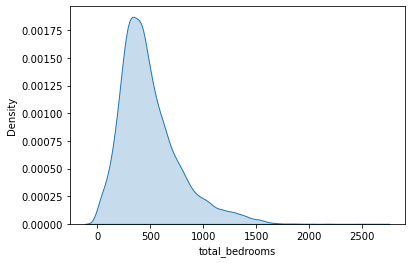

In [25]:
# the difference of mean, max of ['total_bedrooms'] feature is very high in the tabel of describe. the sns kdeplot shwos it clearly. 
sns.kdeplot(df_num_impute['total_bedrooms'] , shade = True , legend = True)
# we have outliers between 1500 and 2500 

<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

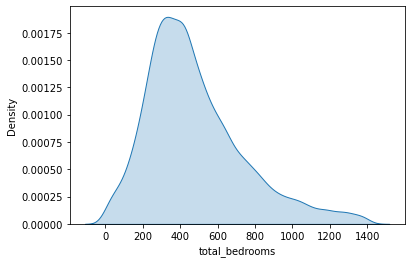

In [26]:
# we normalize the outliers in the above plot.
q = df_num_impute['total_bedrooms'].quantile(0.99)
df = df_num_impute[df_num_impute['total_bedrooms']<q]
sns.kdeplot(df['total_bedrooms'] , shade = True)

In [27]:
# Description of dataset after normalize.
df.describe(include = 'all').round(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0
mean,-120.0,36.0,29.0,2329.0,479.0,1294.0,448.0,4.0,192063.0
std,2.0,2.0,12.0,1359.0,264.0,740.0,247.0,2.0,98147.0
min,-124.0,33.0,1.0,2.0,2.0,3.0,2.0,0.0,14999.0
25%,-122.0,34.0,19.0,1412.0,294.0,782.0,277.0,3.0,115400.0
50%,-119.0,34.0,29.0,2054.0,427.0,1150.0,400.0,3.0,173200.0
75%,-118.0,38.0,37.0,2962.0,612.0,1659.0,575.0,5.0,247900.0
max,-114.0,42.0,52.0,10282.0,1407.0,4660.0,1462.0,15.0,500000.0


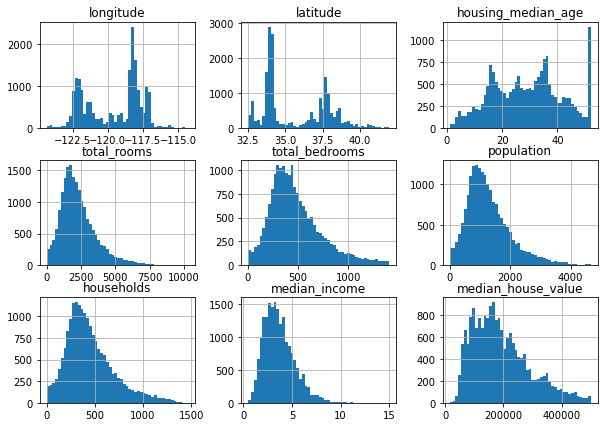

In [28]:
df.hist(bins = 50, figsize = (10,7))
plt.show()

In [29]:

df.describe(include = 'all').round()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0,18894.0
mean,-120.0,36.0,29.0,2329.0,479.0,1294.0,448.0,4.0,192063.0
std,2.0,2.0,12.0,1359.0,264.0,740.0,247.0,2.0,98147.0
min,-124.0,33.0,1.0,2.0,2.0,3.0,2.0,0.0,14999.0
25%,-122.0,34.0,19.0,1412.0,294.0,782.0,277.0,3.0,115400.0
50%,-119.0,34.0,29.0,2054.0,427.0,1150.0,400.0,3.0,173200.0
75%,-118.0,38.0,37.0,2962.0,612.0,1659.0,575.0,5.0,247900.0
max,-114.0,42.0,52.0,10282.0,1407.0,4660.0,1462.0,15.0,500000.0


In [30]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
19080,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
19081,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
19082,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
19083,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# train_test_split

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

data = train_set.copy()

In [32]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18764,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074,188000.0
14037,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820,140800.0
14485,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0
9837,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581,296600.0
7949,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,256300.0
...,...,...,...,...,...,...,...,...,...
11391,-116.69,33.50,13.0,1187.0,255.0,442.0,179.0,1.9107,155700.0
12096,-121.31,38.57,9.0,2748.0,521.0,1663.0,565.0,3.5192,113300.0
5447,-118.25,34.14,13.0,3487.0,1131.0,3749.0,1072.0,2.1602,221900.0
863,-121.94,37.54,31.0,2537.0,382.0,1067.0,410.0,6.7599,356000.0


In [33]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15475,-120.66,35.10,19.0,1583.0,392.0,704.0,269.0,2.1042,268300.0
11220,-117.21,33.95,5.0,8403.0,1240.0,3962.0,1150.0,5.2174,155500.0
6514,-118.01,33.96,36.0,1805.0,288.0,882.0,308.0,5.3054,273500.0
15679,-122.32,37.56,44.0,537.0,173.0,355.0,194.0,2.8571,250000.0
6211,-118.13,34.16,36.0,2162.0,658.0,1337.0,590.0,2.2095,176700.0
...,...,...,...,...,...,...,...,...,...
12223,-117.72,34.05,31.0,2220.0,526.0,1662.0,472.0,2.7321,104300.0
4177,-118.28,34.10,48.0,805.0,246.0,633.0,235.0,2.3421,200000.0
8465,-117.89,34.49,12.0,3449.0,598.0,1502.0,540.0,3.7043,150800.0
17322,-121.65,40.88,15.0,2909.0,549.0,1537.0,522.0,3.0179,61300.0


#                                    End of Section (2)

# 

# --------------------------------------------------------------------------------------------------------------

# (3)Data Relation

In [34]:
#============================================================================
#=======================>> (3)Data Relation <<===============================
#=========================>>  نمایش داده ها <<=================================
#============================================================================

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

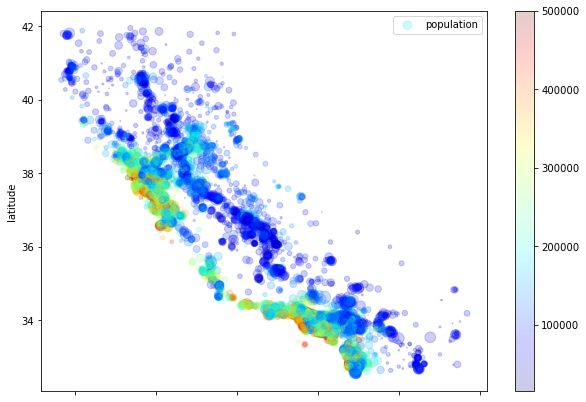

In [35]:
data.plot( kind = 'scatter',
           x = 'longitude',    y = 'latitude', 
           s = data['population']/30,
           label = 'population',
           c = data['median_house_value'], 
           cmap = plt.get_cmap('jet'),
           figsize = (10,7), alpha = 0.2)

# Standard Correlation Coefficient [-1 , 1]

In [36]:
# Standard Correlation Coefficient [-1 , 1]

corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.648061
total_rooms           0.196166
households            0.112771
total_bedrooms        0.086353
housing_median_age    0.074349
population            0.003087
longitude            -0.042021
latitude             -0.152150
Name: median_house_value, dtype: float64

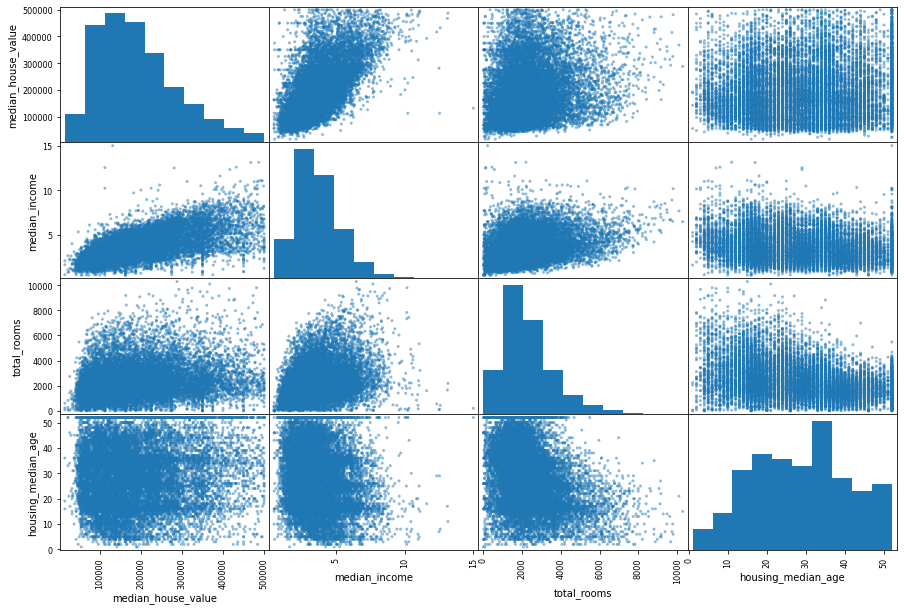

In [37]:
# Plotting to check correlation among the variables with scatter_matrix
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(data[features], figsize = (15,10))
plt.show()

# plot Scatter

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18764,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074,188000.0
14037,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820,140800.0
14485,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0
9837,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581,296600.0
7949,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,256300.0
8987,-121.67,36.68,38.0,5561.0,1292.0,3523.0,1253.0,2.8289,168300.0
8130,-118.38,33.83,20.0,2270.0,498.0,1070.0,521.0,4.4615,384800.0
5953,-117.96,34.14,9.0,907.0,207.0,619.0,194.0,3.9464,179600.0
2857,-118.97,35.37,34.0,1379.0,333.0,1156.0,315.0,1.7197,48900.0
10455,-117.96,33.78,33.0,1520.0,427.0,658.0,242.0,4.8750,269300.0


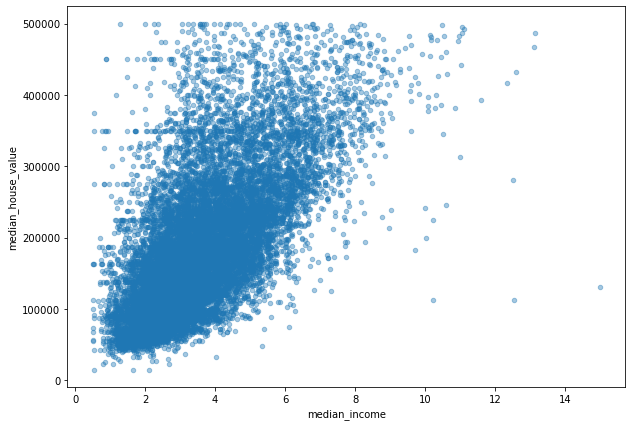

In [39]:
# ['median_income], ['median_house_value'] have strong Correlation and we plot it.
data.plot( kind = 'scatter', x = 'median_income', y = 'median_house_value',
           figsize = (10,7), alpha = 0.4)

data.head(10)

# New attributes

In [40]:
# we create 3 new attributes that have good Correlation between them and ['median_house_value'].
data['total_rooms_per_households'] = data['total_rooms']/data['households']
data['total_bedrooms_per_total_rooms'] = data['total_bedrooms']/data['total_rooms']
data['population_per_households'] = data['population']/data['households']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
18764,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074,188000.0,5.181818,0.201128,4.474026
14037,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820,140800.0,5.918495,0.168962,2.978056
14485,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0,6.497018,0.150245,2.844930
9837,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581,296600.0,6.429412,0.161635,2.837255
7949,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,256300.0,3.254902,0.310241,1.735294


# Standard Correlation Coefficient [-1 , 1]

In [41]:
# Standard Correlation Coefficient [-1 , 1]
corr_matrix = data.corr()

In [42]:
corr_matrix['median_house_value'].sort_values(ascending = False).round(2)

median_house_value                1.00
median_income                     0.65
total_rooms                       0.20
households                        0.11
total_rooms_per_households        0.11
total_bedrooms                    0.09
housing_median_age                0.07
population                        0.00
longitude                        -0.04
latitude                         -0.15
population_per_households        -0.18
total_bedrooms_per_total_rooms   -0.20
Name: median_house_value, dtype: float64

In [43]:
# show dataset data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
18764,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074,188000.0,5.181818,0.201128,4.474026
14037,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820,140800.0,5.918495,0.168962,2.978056
14485,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0,6.497018,0.150245,2.844930
9837,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581,296600.0,6.429412,0.161635,2.837255
7949,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,256300.0,3.254902,0.310241,1.735294
...,...,...,...,...,...,...,...,...,...,...,...,...
11391,-116.69,33.50,13.0,1187.0,255.0,442.0,179.0,1.9107,155700.0,6.631285,0.214827,2.469274
12096,-121.31,38.57,9.0,2748.0,521.0,1663.0,565.0,3.5192,113300.0,4.863717,0.189592,2.943363
5447,-118.25,34.14,13.0,3487.0,1131.0,3749.0,1072.0,2.1602,221900.0,3.252799,0.324348,3.497201
863,-121.94,37.54,31.0,2537.0,382.0,1067.0,410.0,6.7599,356000.0,6.187805,0.150572,2.602439


# End of Section (3)

# 

# 

# --------------------------------------------------------------------------------------------------------------

# (4) Model Planing

In [44]:
#============================================================================
#========================>> (4) Data Cleaning <<=============================
#=========================>>  تمیز کردن داده ها <<==============================
#============================================================================


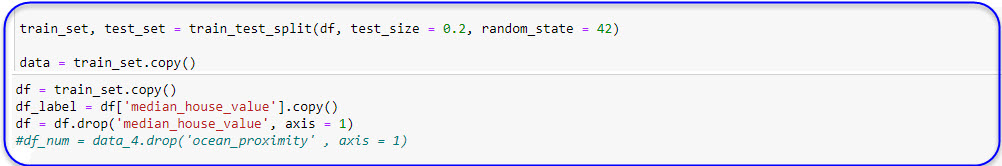

In [45]:
df = train_set.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value', axis = 1)
#df_num = data_4.drop('ocean_proximity' , axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
18764,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074
14037,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820
14485,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652
9837,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581
7949,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409
...,...,...,...,...,...,...,...,...
11391,-116.69,33.50,13.0,1187.0,255.0,442.0,179.0,1.9107
12096,-121.31,38.57,9.0,2748.0,521.0,1663.0,565.0,3.5192
5447,-118.25,34.14,13.0,3487.0,1131.0,3749.0,1072.0,2.1602
863,-121.94,37.54,31.0,2537.0,382.0,1067.0,410.0,6.7599


# Custom Transform

In [46]:
#=============================== Custom Transform ==============================

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x, y = None):
        rooms_per_households = x[ :, rooms_ix] / x[ :, households_ix]
        population_per_households = x[ :, population_ix] / x[ :, households_ix]
        bedrooms_per_rooms = x[ :, bedrooms_ix] / x[ :, rooms_ix]
        return np.c_[x, rooms_per_households, population_per_households, bedrooms_per_rooms]
        #return np.concatenate((x, rooms_per_households, population_per_households, bedrooms_per_rooms), axis = 1)
        
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)

columns = list(df.columns)
columns.append('rooms_per_household')
columns.append('population_per_household')
columns.append('bedrooms_per_rooms')
data_custom_tr.columns = columns

data_custom_tr.head(10)
data_custom_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms
0,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074,5.181818,4.474026,0.201128
1,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820,5.918495,2.978056,0.168962
2,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,6.497018,2.844930,0.150245
3,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581,6.429412,2.837255,0.161635
4,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,3.254902,1.735294,0.310241
...,...,...,...,...,...,...,...,...,...,...,...
15110,-116.69,33.50,13.0,1187.0,255.0,442.0,179.0,1.9107,6.631285,2.469274,0.214827
15111,-121.31,38.57,9.0,2748.0,521.0,1663.0,565.0,3.5192,4.863717,2.943363,0.189592
15112,-118.25,34.14,13.0,3487.0,1131.0,3749.0,1072.0,2.1602,3.252799,3.497201,0.324348
15113,-121.94,37.54,31.0,2537.0,382.0,1067.0,410.0,6.7599,6.187805,2.602439,0.150572


# Feature Scaling

In [47]:
#===================================== Feature Scaling ==============================
from sklearn.preprocessing import StandardScaler

feature_scale = StandardScaler()
#aux = feature_scale.fit_transform(data_custom_tr.values)
#data_num_scaled_tr = pd.DataFrame(aux, columns = data_custom_tr.columns)

data_num_scaled_tr = pd.DataFrame(feature_scale.fit_transform(data_custom_tr.values)
                                  , columns = data_custom_tr.columns)
data_num_scaled_tr.info()
data_num_scaled_tr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15115 entries, 0 to 15114
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15115 non-null  float64
 1   latitude                  15115 non-null  float64
 2   housing_median_age        15115 non-null  float64
 3   total_rooms               15115 non-null  float64
 4   total_bedrooms            15115 non-null  float64
 5   population                15115 non-null  float64
 6   households                15115 non-null  float64
 7   median_income             15115 non-null  float64
 8   rooms_per_household       15115 non-null  float64
 9   population_per_household  15115 non-null  float64
 10  bedrooms_per_rooms        15115 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms
0,0.213217,-0.701554,-0.310770,-0.542621,-0.598891,0.110563,-0.569771,0.215422,-0.076217,1.404706,-0.215155
1,1.292972,-1.312646,-0.391854,-0.329379,-0.606426,-0.466020,-0.525456,1.027760,0.239555,0.014495,-0.710545
2,1.357658,-1.372829,-1.283780,0.678410,0.041592,0.181962,0.215814,1.335716,0.487536,-0.109220,-0.998808
3,0.889930,-0.933028,-1.608117,0.686443,0.188527,0.203517,0.244015,2.414648,0.458557,-0.116353,-0.823393
4,0.611284,-0.826550,0.256819,-1.465697,-1.420216,-1.507371,-1.399672,-0.209356,-0.902179,-1.140410,1.465305
...,...,...,...,...,...,...,...,...,...,...,...
15110,1.447223,-1.011730,-1.283780,-0.841306,-0.847549,-1.150375,-1.089467,-1.120862,0.545088,-0.458319,-0.004168
15111,-0.851610,1.335419,-1.608117,0.298664,0.154619,0.494502,0.465590,-0.095721,-0.212570,-0.017746,-0.392812
15112,0.670994,-0.715443,-1.283780,0.838342,2.452823,3.304669,2.508114,-0.961848,-0.903081,0.496939,1.682562
15113,-1.165087,0.858582,0.175735,0.144574,-0.369070,-0.308402,-0.158850,1.969666,0.354993,-0.334568,-0.993776


# Label Encoder

In [48]:
#======================================= Label Encoder ==============================

#encoder = LabelEncoder()
#data_cat = df_categorical['ocean_proximity']
#data_cat_encoded = encoder.fit_transform(data_cat)
#data_cat_encoded = pd.DataFrame(data_cat_encoded, columns = ['ocean_proximity'] )
#data_cat_encoded

# OneHot Encoder

In [49]:
#======================================= OneHot Encoder ==============================


encoder_1hot = OneHotEncoder(sparse = False)
data_cat = df_categorical[['ocean_proximity']]

data_cat_1hot_temp = encoder_1hot.fit_transform(data_cat)
data_cat_1hot = pd.DataFrame(data_cat_1hot_temp)

#train_set_1hot , test_set_1hot = train_test_split(data_cat_1hot, test_size = 0.2080, random_state = 42

data_balanced = data_cat_1hot.copy()

for i in range( len(data_num_scaled_tr) ,  len(data_balanced)):
    data_balanced.drop ([i], inplace = True , axis = 0)                # ========> data_balanced : 15115 rows × 16 columns


data_cat_1hot_columns = encoder_1hot.get_feature_names(['prox'])       # ========> data_cat_1hot : 19085 rows × 16 columns
final_train_set = pd.concat([data_num_scaled_tr, data_balanced], axis = 1 )

final_train_set.info()
final_train_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15115 entries, 0 to 15114
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15115 non-null  float64
 1   latitude                  15115 non-null  float64
 2   housing_median_age        15115 non-null  float64
 3   total_rooms               15115 non-null  float64
 4   total_bedrooms            15115 non-null  float64
 5   population                15115 non-null  float64
 6   households                15115 non-null  float64
 7   median_income             15115 non-null  float64
 8   rooms_per_household       15115 non-null  float64
 9   population_per_household  15115 non-null  float64
 10  bedrooms_per_rooms        15115 non-null  float64
 11  0                         15115 non-null  float64
 12  1                         15115 non-null  float64
 13  2                         15115 non-null  float64
 14  3     

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms,0,1,2,3,4
0,0.213217,-0.701554,-0.310770,-0.542621,-0.598891,0.110563,-0.569771,0.215422,-0.076217,1.404706,-0.215155,0.0,0.0,0.0,1.0,0.0
1,1.292972,-1.312646,-0.391854,-0.329379,-0.606426,-0.466020,-0.525456,1.027760,0.239555,0.014495,-0.710545,0.0,0.0,0.0,1.0,0.0
2,1.357658,-1.372829,-1.283780,0.678410,0.041592,0.181962,0.215814,1.335716,0.487536,-0.109220,-0.998808,0.0,0.0,0.0,1.0,0.0
3,0.889930,-0.933028,-1.608117,0.686443,0.188527,0.203517,0.244015,2.414648,0.458557,-0.116353,-0.823393,0.0,0.0,0.0,1.0,0.0
4,0.611284,-0.826550,0.256819,-1.465697,-1.420216,-1.507371,-1.399672,-0.209356,-0.902179,-1.140410,1.465305,0.0,0.0,0.0,1.0,0.0


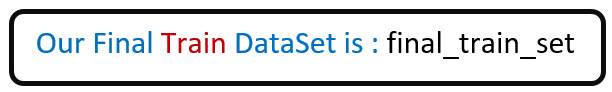

# 

# 

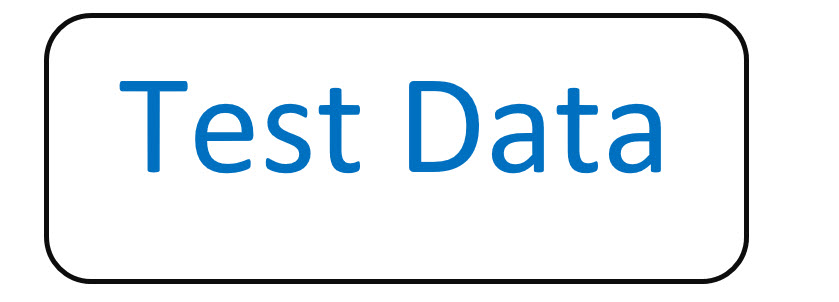

# First Test   DataSet

In [50]:
data_test1 = test_set.copy()  
df_test_label = data_test1['median_house_value'].copy() 

data_test1 = data_test1.drop(['median_house_value'] , axis = 1) 

data_test1 = data_test1.reset_index(drop = True)
data_test1                                                       # ==============> data_test1 : 3779 rows × 8 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.66,35.10,19.0,1583.0,392.0,704.0,269.0,2.1042
1,-117.21,33.95,5.0,8403.0,1240.0,3962.0,1150.0,5.2174
2,-118.01,33.96,36.0,1805.0,288.0,882.0,308.0,5.3054
3,-122.32,37.56,44.0,537.0,173.0,355.0,194.0,2.8571
4,-118.13,34.16,36.0,2162.0,658.0,1337.0,590.0,2.2095
...,...,...,...,...,...,...,...,...
3774,-117.72,34.05,31.0,2220.0,526.0,1662.0,472.0,2.7321
3775,-118.28,34.10,48.0,805.0,246.0,633.0,235.0,2.3421
3776,-117.89,34.49,12.0,3449.0,598.0,1502.0,540.0,3.7043
3777,-121.65,40.88,15.0,2909.0,549.0,1537.0,522.0,3.0179


In [51]:
data_test1['total_rooms_per_households'] = data_test1['total_rooms'] / data_test1['households']
data_test1['total_bedrooms_per_total_rooms'] = data_test1['total_bedrooms'] / data_test1['total_rooms']
data_test1['population_per_households'] = data_test1['population'] / data_test1['households']


data_test1 = data_test1.reset_index(drop = True)
data_test1                                                       # ==============> data_test1 : 3779 rows × 11 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
0,-120.66,35.10,19.0,1583.0,392.0,704.0,269.0,2.1042,5.884758,0.247631,2.617100
1,-117.21,33.95,5.0,8403.0,1240.0,3962.0,1150.0,5.2174,7.306957,0.147566,3.445217
2,-118.01,33.96,36.0,1805.0,288.0,882.0,308.0,5.3054,5.860390,0.159557,2.863636
3,-122.32,37.56,44.0,537.0,173.0,355.0,194.0,2.8571,2.768041,0.322160,1.829897
4,-118.13,34.16,36.0,2162.0,658.0,1337.0,590.0,2.2095,3.664407,0.304348,2.266102
...,...,...,...,...,...,...,...,...,...,...,...
3774,-117.72,34.05,31.0,2220.0,526.0,1662.0,472.0,2.7321,4.703390,0.236937,3.521186
3775,-118.28,34.10,48.0,805.0,246.0,633.0,235.0,2.3421,3.425532,0.305590,2.693617
3776,-117.89,34.49,12.0,3449.0,598.0,1502.0,540.0,3.7043,6.387037,0.173384,2.781481
3777,-121.65,40.88,15.0,2909.0,549.0,1537.0,522.0,3.0179,5.572797,0.188725,2.944444


# feature_scale  First DataSet

In [52]:
feature_scale_test = StandardScaler()

data_num_scaled_tr_test = pd.DataFrame(feature_scale_test.fit_transform(data_test1.values)
                                  , columns = data_test1.columns)
data_num_scaled_tr_test.info()
data_num_scaled_tr_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       3779 non-null   float64
 1   latitude                        3779 non-null   float64
 2   housing_median_age              3779 non-null   float64
 3   total_rooms                     3779 non-null   float64
 4   total_bedrooms                  3779 non-null   float64
 5   population                      3779 non-null   float64
 6   households                      3779 non-null   float64
 7   median_income                   3779 non-null   float64
 8   total_rooms_per_households      3779 non-null   float64
 9   total_bedrooms_per_total_rooms  3779 non-null   float64
 10  population_per_households       3779 non-null   float64
dtypes: float64(11)
memory usage: 324.9 KB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
0,-0.566844,-0.240339,-0.822187,-0.534610,-0.315754,-0.797892,-0.724006,-0.976577,0.292588,0.503255,-0.053198
1,1.170375,-0.778556,-1.949240,4.646415,2.947246,3.662384,2.929691,0.971557,1.010447,-1.131792,0.031725
2,0.767542,-0.773876,0.546378,-0.365961,-0.715933,-0.554206,-0.562264,1.026624,0.280288,-0.935870,-0.027916
3,-1.402723,0.910979,1.190408,-1.329236,-1.158439,-1.275681,-1.035047,-0.505438,-1.280585,1.721053,-0.133926
4,0.707117,-0.680273,0.546378,-0.094754,0.707781,0.068699,0.607250,-0.910684,-0.828141,1.430001,-0.089193
...,...,...,...,...,...,...,...,...,...,...,...
3774,0.913569,-0.731755,0.143859,-0.050693,0.199862,0.513632,0.117879,-0.583659,-0.303711,0.328514,0.039516
3775,0.631586,-0.708354,1.512423,-1.125642,-0.877544,-0.895093,-0.865011,-0.827707,-0.948714,1.450299,-0.045352
3776,0.827967,-0.525828,-1.385713,0.882955,0.476909,0.294588,0.399890,0.024711,0.546115,-0.709941,-0.036341
3777,-1.065350,2.464789,-1.144202,0.472727,0.288363,0.342504,0.325240,-0.404815,0.135125,-0.459270,-0.019629


# Second Test   DataSet

In [53]:
data_test2_tmp = data_cat_1hot.copy()

for j in range (0 , len(data_balanced)+1):
    data_test2_tmp.drop([j], inplace = True, axis = 0)
    
    
data_test2_tmp = data_test2_tmp.reset_index(drop = True)    
data_test2_tmp                                                       # ==============> data_test2_tmp : 3969 rows × 5 columns


#-----------------------------------------------------------------------------------------------------------

data_test2 = data_test2_tmp.copy()

for s in range( len(data_test1) , len(data_test2_tmp) ):
    data_test2.drop ([s], inplace = True, axis = 0)
    
data_test2                                                            # ==============> data_test2 : 3779 rows × 5 columns

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
3774,1.0,0.0,0.0,0.0,0.0
3775,1.0,0.0,0.0,0.0,0.0
3776,1.0,0.0,0.0,0.0,0.0
3777,1.0,0.0,0.0,0.0,0.0


# Concat 2 test datasets (First Sloution)

In [54]:
#==============================================  First Sloution  ====================================#

#data_test_tmp = np.c_[data_num_scaled_tr_test , data_test2]
#data_test_tmp

#data_test = pd.DataFrame(data_test_tmp )
#data_test                                                              # ==============> data_test : 3779 rows × 16 columns

# Concat 2 test datasets (Second Sloution)

In [55]:
#==============================================  Second Sloution  ====================================#


data_test_tmp = pd.concat([data_num_scaled_tr_test , data_test2] , axis = 1)
data_test_tmp

final_test_set = pd.DataFrame(data_test_tmp )
final_test_set                                                          # ==============> data_test : 3779 rows × 16 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households,0,1,2,3,4
0,-0.566844,-0.240339,-0.822187,-0.534610,-0.315754,-0.797892,-0.724006,-0.976577,0.292588,0.503255,-0.053198,0.0,1.0,0.0,0.0,0.0
1,1.170375,-0.778556,-1.949240,4.646415,2.947246,3.662384,2.929691,0.971557,1.010447,-1.131792,0.031725,0.0,1.0,0.0,0.0,0.0
2,0.767542,-0.773876,0.546378,-0.365961,-0.715933,-0.554206,-0.562264,1.026624,0.280288,-0.935870,-0.027916,0.0,1.0,0.0,0.0,0.0
3,-1.402723,0.910979,1.190408,-1.329236,-1.158439,-1.275681,-1.035047,-0.505438,-1.280585,1.721053,-0.133926,0.0,1.0,0.0,0.0,0.0
4,0.707117,-0.680273,0.546378,-0.094754,0.707781,0.068699,0.607250,-0.910684,-0.828141,1.430001,-0.089193,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,0.913569,-0.731755,0.143859,-0.050693,0.199862,0.513632,0.117879,-0.583659,-0.303711,0.328514,0.039516,1.0,0.0,0.0,0.0,0.0
3775,0.631586,-0.708354,1.512423,-1.125642,-0.877544,-0.895093,-0.865011,-0.827707,-0.948714,1.450299,-0.045352,1.0,0.0,0.0,0.0,0.0
3776,0.827967,-0.525828,-1.385713,0.882955,0.476909,0.294588,0.399890,0.024711,0.546115,-0.709941,-0.036341,1.0,0.0,0.0,0.0,0.0
3777,-1.065350,2.464789,-1.144202,0.472727,0.288363,0.342504,0.325240,-0.404815,0.135125,-0.459270,-0.019629,1.0,0.0,0.0,0.0,0.0


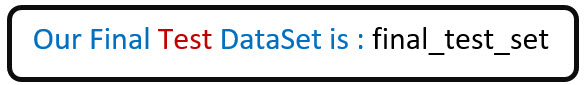

#  End of Section (4)

# 

# 

# --------------------------------------------------------------------------------------------------------------

# (5) model Building

In [56]:
#=============================================================================
#====================>> (5) Model Building <<=================================
#======================>>  ساخت مدل <<=======================================
#=============================================================================

# Linear Regression

In [57]:
#=============================================================================
#=======================>> Linear Regression <<===============================
#=========================>>  رگرسیون خطی <<==================================
#=============================================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(final_train_set, df_label)        # ==========>  lin_reg.fit(input, output)

sample_data_prepared = final_train_set.iloc[:4]
print('prediction:\t', lin_reg.predict(sample_data_prepared).round())

sample_labels = df_label.iloc[:4]
print('labels:\t\t', list(sample_labels))

#============== metrics for RMSE ==========================

housing_predictions = lin_reg.predict(final_train_set)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
int(lin_rmse.round())

prediction:	 [210438. 250264. 260959. 328611.]
labels:		 [188000.0, 140800.0, 259900.0, 296600.0]


60486

# Decision tree

In [58]:
#=============================================================================
#=======================>> Decision tree <<===================================
#=========================>>  درخت تصمیم <<===================================
#=============================================================================

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(final_train_set, df_label)
housing_prediction = tree_reg.predict(final_train_set)
tree_mse = mean_squared_error(df_label, housing_prediction)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

# Cross Validation_Decision tree

In [59]:
#=============================================================================
#==================>> Cross Validation_Decision tree<<========================
#====================>>  آنتروپی تقاطعی_ درخت تصمیم <<===========================
#=============================================================================

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, final_train_set, df_label, scoring = 'neg_mean_squared_error', cv = 10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print('')
    print('================================== model_name ==================================')
    print('')
    print('scores: ', scores.round())
    print('Mean: ', scores.mean().round())
    print('std: ', scores.std().round())
    print('================================================================================')
    
display_scores(trees_rmse_scores, 'Decision Tree Regression')


================================== model_name ==================================

scores:  [63930. 69161. 67776. 70663. 65350. 72075. 66393. 65267. 62765. 69591.]
Mean:  67297.0
std:  2894.0


# Linear Regression_Decision tree

In [60]:
#=============================================================================
#=================>> Linear Regression_Decision tree <<=======================
#====================>>  آنتروپـی تقاطعی_رگرسیون خطی <<==========================
#=============================================================================

linear_scores = cross_val_score(lin_reg, final_train_set, df_label, scoring = 'neg_mean_squared_error',cv = 10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, 'Linear Regression')


================================== model_name ==================================

scores:  [60775. 59299. 59567. 62705. 61619. 65028. 61736. 59216. 58755. 58543.]
Mean:  60724.0
std:  1964.0


# Random Forest

In [61]:
#=============================================================================
#========================>> Random Forest <<==================================
#=========================>>  جنگل تصادفی <<===================================
#=============================================================================

from sklearn.ensemble import RandomForestRegressor
import time

t1 = time.time()

forest_reg = RandomForestRegressor()
forest_reg.fit(final_train_set, df_label)
forest_scores = cross_val_score(forest_reg, final_train_set, df_label, scoring = 'neg_mean_squared_error',cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores , 'Random Forest Regression')

t2 = time.time()
t = t2-t1
print()
print('execution time  for Random_Forest algorithm is : ', t//1 , 'seconds')


================================== model_name ==================================

scores:  [46551. 48006. 45795. 48026. 47161. 50025. 46063. 44244. 44317. 44677.]
Mean:  46486.0
std:  1770.0

execution time  for Random_Forest algorithm is :  140.0 seconds


#  End of Section (5)

# 

# -------------------------------------------------------------------------------------------------------------

# (6)Monitoring model

In [62]:
#=============================================================================
#====================>> (6)Monitoring model <<================================
#======================>>  تنظیمات و نظارت <<===================================
#=============================================================================

#=========================>> GridSearchCV <<==================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

t1 = time.time()

param_grid = [{'n_estimators' : [3,4,6,10,30], 'max_features' :[2,6,8,15]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv= 5, scoring = 'neg_mean_squared_error')
grid_search. fit(final_train_set, df_label)

print('Best parameters:' , grid_search.best_params_)
print('Best Estimator:' , grid_search.best_estimator_)

t2 = time.time()
t = t2-t1
print('executed tims is:' , round((t/60),2), 'minutes')

Best parameters: {'max_features': 8, 'n_estimators': 30}
Best Estimator: RandomForestRegressor(max_features=8, n_estimators=30)
executed tims is: 1.06 minutes


# GridSearchCV for all parameters

In [63]:
#==================>> GridSearchCV for all parameters<<===========================

t1 = time.time()

results = grid_search.cv_results_
for mean_score, param in zip(results['mean_test_score'] , results['params']):
    print(np.sqrt(-mean_score), param)
    
t2 = time.time()
t = t2-t1
print('executed tims is:' , round((t/60),2), 'minutes')

65820.48706640063 {'max_features': 2, 'n_estimators': 3}
62649.35605736362 {'max_features': 2, 'n_estimators': 4}
59845.72116790836 {'max_features': 2, 'n_estimators': 6}
56048.18053811057 {'max_features': 2, 'n_estimators': 10}
53593.30467785148 {'max_features': 2, 'n_estimators': 30}
55488.58485682044 {'max_features': 6, 'n_estimators': 3}
55206.73355985108 {'max_features': 6, 'n_estimators': 4}
51474.83448611683 {'max_features': 6, 'n_estimators': 6}
49702.50124822911 {'max_features': 6, 'n_estimators': 10}
47524.369845949135 {'max_features': 6, 'n_estimators': 30}
56132.55628371337 {'max_features': 8, 'n_estimators': 3}
53764.43855019422 {'max_features': 8, 'n_estimators': 4}
50691.271061751584 {'max_features': 8, 'n_estimators': 6}
48783.960563905624 {'max_features': 8, 'n_estimators': 10}
47379.733766322875 {'max_features': 8, 'n_estimators': 30}
56309.48187866866 {'max_features': 15, 'n_estimators': 3}
53716.44438352444 {'max_features': 15, 'n_estimators': 4}
51108.64001624902 {

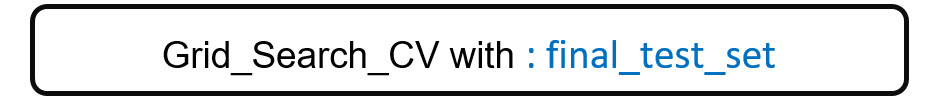

# Grid_Search_CV with final_test_set

In [64]:
#=====================>> Grid_Search_CV with final_test_set <<=============================
import time

t1 = time.time()

final_model = grid_search.best_estimator_
df_test = final_test_set.copy()                                     
#df_test_label = df_test['median_house_value'].copy()            
#df_test = df_test.drop(['median_house_value'] , axis = 1)        

             
final_predictions = final_model.predict(df_test)           

final_mse = mean_squared_error(df_test_label, final_predictions)       
final_rmse = np.sqrt(final_mse)
final_rmse
print('final_rmse : ', final_rmse.round())

t2 = time.time()
t = t2-t1
print('executed tims is:' , round((t/60),2), 'minutes')

final_rmse :  69578.0
executed tims is: 0.0 minutes


# 

#  End of Section (6)